# Description

In [9]:
# Importing the pandas library
import pandas as pd

In [10]:
#read the dataset using pandas.
df=pd.read_csv(r'C:\Users\pavan\Downloads\un-general-debates-blueprint.csv')

In [11]:
# Observing the first five records.
df.head()

,session,year,country,country_name,speaker,position,text
0,25,1970,ALB,Albania,Mr. NAS,NaN,33: May I first convey to our President the co...
1,25,1970,ARG,Argentina,Mr. DE PABLO PARDO,NaN,177.\t : It is a fortunate coincidence that pr...
2,25,1970,AUS,Australia,Mr. McMAHON,NaN,100.\t It is a pleasure for me to extend to y...
3,25,1970,AUT,Austria,Mr. KIRCHSCHLAEGER,NaN,155.\t May I begin by expressing to Ambassado...
4,25,1970,BEL,Belgium,Mr. HARMEL,NaN,"176. No doubt each of us, before coming up to ..."


TEXT CLEANING 

In [12]:
# importing the nltk library to download the stopwords
import nltk 
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

{'until', 'he', 'your', 'am', 'i', 'couldn', 'hadn', "weren't", 'through', 'there', 'few', 'is', 'shouldn', 'between', 'wasn', 'they', 'its', 'having', 'be', 'yours', 'if', 'will', 'himself', 'haven', 'some', 'out', 'didn', 'of', 'those', 'd', 'won', 'does', 'too', 'what', 'who', 'don', 'to', 'was', 'ourselves', 'she', 'itself', 'll', 'how', 'me', 'same', 've', 'ain', 'a', "isn't", 'his', 'from', "should've", "won't", 'here', 'should', 'mightn', "shouldn't", 'down', 'themselves', 'were', 'has', "you're", 'off', 'not', 'an', 'up', 'both', "didn't", 'all', 'hasn', 'isn', "you'll", "couldn't", 'nor', 'where', 'these', 'on', 'once', 'as', "hasn't", 'for', 't', 'weren', 'theirs', 'in', 'against', 'by', 'him', 'most', 'which', 'before', "doesn't", 'shan', "wouldn't", 'herself', 'and', 'this', 'my', 'so', 'than', 'now', 'ours', 'any', 'mustn', 'above', 'them', 'aren', 'myself', "she's", 'can', 're', 's', 'under', 'you', 'more', 'been', 'had', 'below', 'other', 'while', 'have', "mightn't", 'he

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pavan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
# Cleaning the text by performing tokenization, removing the stopwords and preprocessing the text.
import regex as re

def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]
pipeline = [str.lower, tokenize, remove_stop]

def prepare(text, pipeline):
    tokens = text
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens
df['tokens'] = df['text'].apply(prepare, pipeline=pipeline)


In [14]:
# Counting the frequency of the tokens
from collections import Counter

# Assuming df is already defined
counter = Counter()
df['tokens'].map(counter.update)
freq_df = pd.DataFrame(counter.items(), columns=['token', 'freq'])
freq_df = freq_df[freq_df['freq'] >= 1]  # Filtering frequencies >= 1
freq_df = freq_df.sort_values(by='freq', ascending=False)
freq_df.set_index('token', inplace=True)
freq_df.head(10)


,freq
token,
nations,124508
united,120763
international,117223
world,89421
countries,85734
peace,72625
development,62632
states,59713
people,59338


In [15]:
freq_df['freq']

token
nations          124508
united           120763
international    117223
world             89421
countries         85734
                  ...  
states-latin          1
of77                  1
lak                   1
pandaranaike          1
e-network             1
Name: freq, Length: 68302, dtype: int64

In [16]:
pip install WordCloud

Note: you may need to restart the kernel to use updated packages.


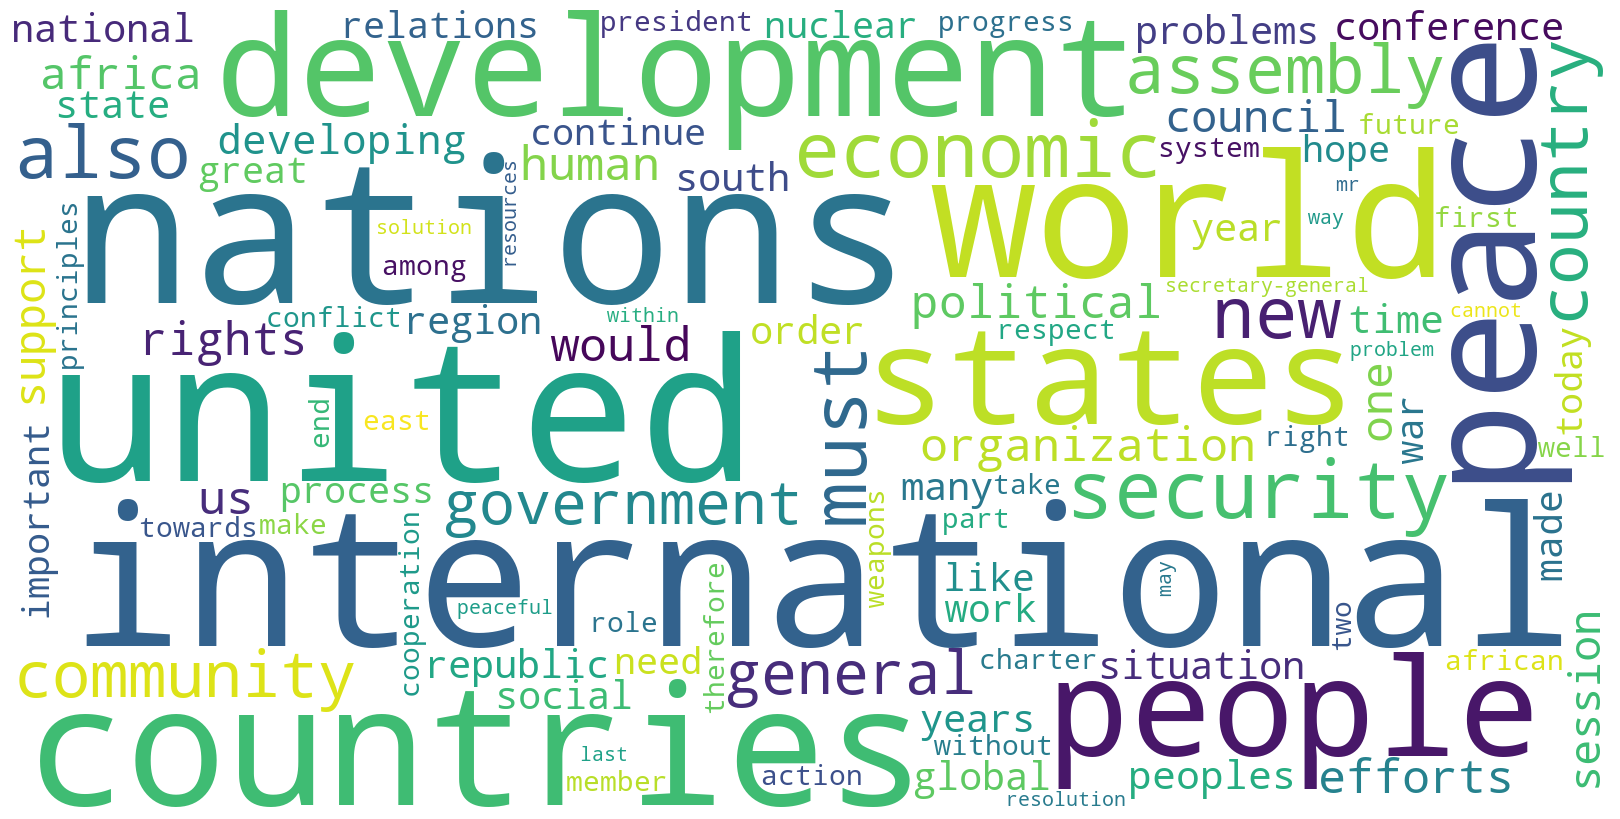

In [18]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt

# Create the word cloud object with enhanced parameters
wc = WordCloud(
    background_color='white',  # White background for better clarity
    width=1600,  # Increased width for better resolution
    height=800,  # Increased height for better resolution
    max_words=100,
    margin=2,
    max_font_size=200,
    min_font_size=10,
    colormap='viridis'  # Color map for better contrast
)

# Generate the word cloud from the frequency dictionary
wc.fit_words(freq_df['freq'].to_dict())

# Plot the word cloud
plt.figure(figsize=(16, 8), facecolor=None)  # Larger figure size for better clarity
plt.imshow(wc, interpolation='bilinear')  # Use bilinear interpolation for smooth scaling
plt.axis("off")  # Hide axes for a cleaner look
plt.tight_layout(pad=0)
plt.show()



DOCUMENT FREQUENCY AND INVERSE DOCUMENT FREQUENCY

In [19]:
# Finding the document frequency and then inverse document frequency
import numpy as np
def compute_idf(df, column='tokens', preprocess=None, min_df=1):
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(set(tokens))
    # count tokens
    counter = Counter()
    df[column].map(update)
    # create data frame and compute idf
    idf_df = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
    idf_df = idf_df.query('df >= @min_df')
    idf_df['idf'] = np.log(len(df)/idf_df['df'])+0.1
    idf_df.index.name = 'token'
    return idf_df
idf_df = compute_idf(df)


In [20]:
idf_df['idf']


token
aggressive           2.526816
find                 0.718107
amman                5.468243
demoralizing         7.077681
aroused              3.340011
                       ...   
15-to-21-year-old    9.023591
officiate            9.023591
states-supported     9.023591
e-network            9.023591
pan-africa           9.023591
Name: idf, Length: 68302, dtype: float64

In [21]:
# Multiplying the term frequency and inverse document frequency
freq_df['tfidf'] = freq_df['freq'] * idf_df['idf']
freq_df.head()


,freq,tfidf
token,,
nations,124508,12649.986284
united,120763,12285.608632
international,117223,12364.276226
world,89421,9503.708982
countries,85734,10888.485986


WORD CLOUD

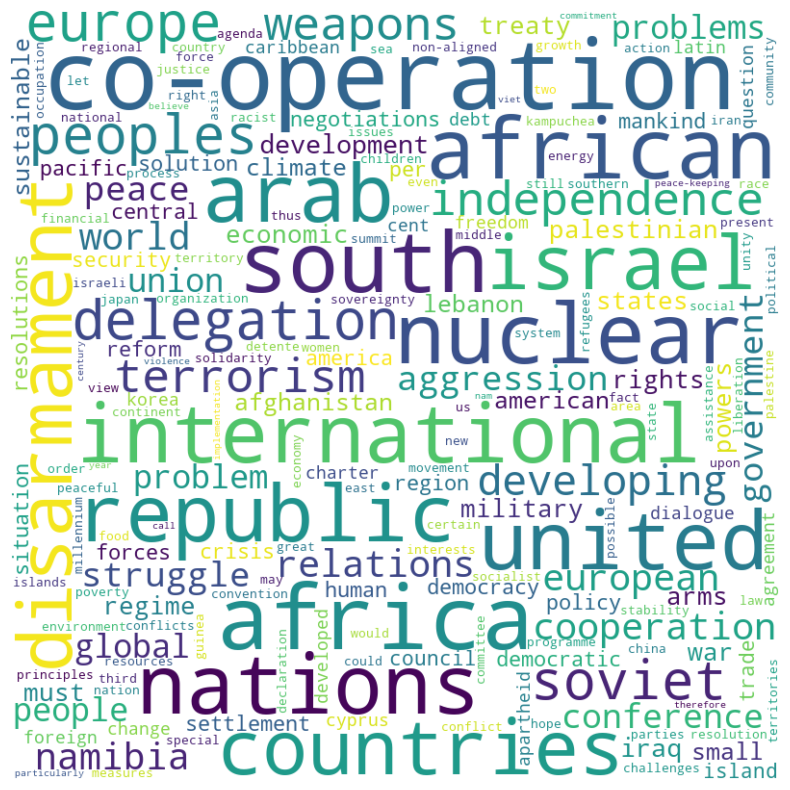

In [22]:
# displays a word cloud visualization from a DataFrame of product of term frequency and the inverse document frequency using the WordCloud library and Matplotlib.
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming freq_df['tfidf'] is a dictionary with word frequencies

# Create WordCloud object
wc = WordCloud(background_color='white', width=800, height=800, max_words=200, max_font_size=100, collocations=False)

# Fit the WordCloud object with your data
wc.fit_words(freq_df['tfidf'])

# Display the word cloud
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()


In [23]:
# calculates the count of specific keywords within a list of tokens and returns a list of counts corresponding to each keyword.
df['num_tokens'] = df['tokens'].map(len)

def count_keywords(tokens, keywords): 
    tokens = [t for t in tokens if t in keywords]
    counter = Counter(tokens)
    return [counter.get(k, 0) for k in keywords]



In [24]:
#count_keywords_by function calculates the sum of keyword counts grouped by a specified column in the DataFrame.
def count_keywords_by(df, by, keywords, column='tokens'):
    
    df = df.reset_index(drop=True) # if the supplied dataframe has gaps in the index
    freq_matrix = df[column].apply(count_keywords, keywords=keywords)
    freq_df = pd.DataFrame.from_records(freq_matrix, columns=keywords)
    freq_df[by] = df[by] # copy the grouping column(s)
    
    return freq_df.groupby(by=by).sum().sort_values(by)

relative frequency of specific keywords over years

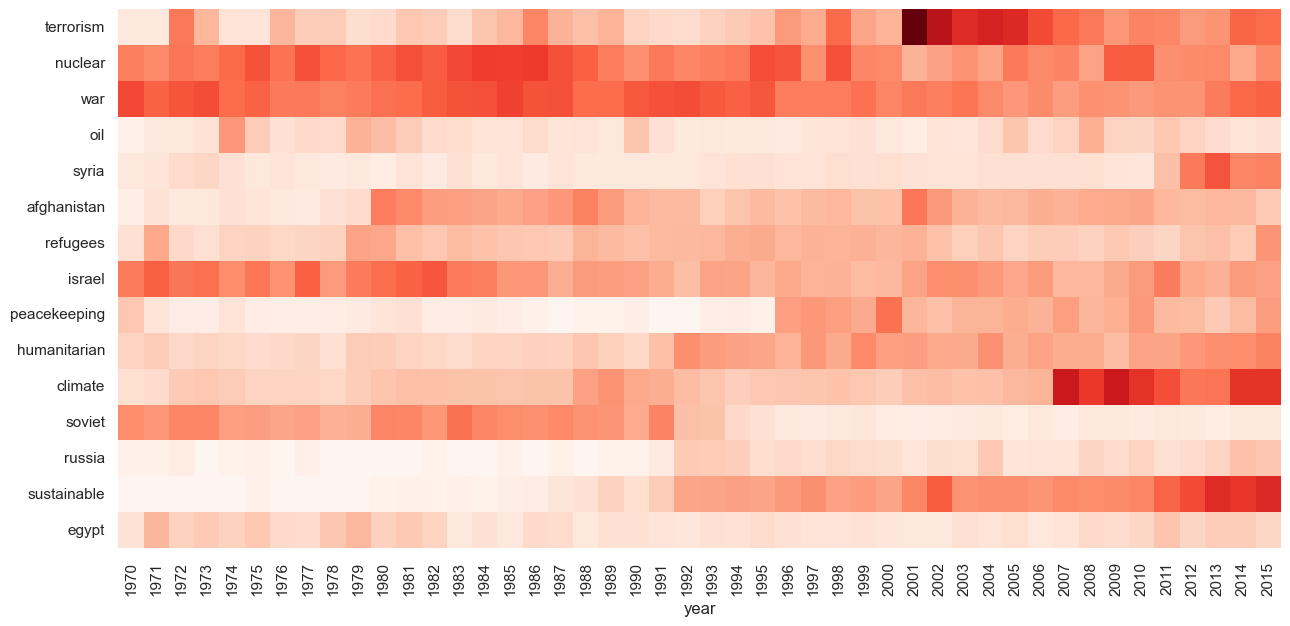

In [25]:
# visualizes the relative frequency of specific keywords over years using a heatmap with seaborn.
import seaborn as sns
keywords = ['terrorism', 'nuclear', 'war', 'oil',
            'syria', 'afghanistan', 'refugees', 'israel', 'peacekeeping', 
            'humanitarian', 'climate', 'soviet','russia', 'sustainable','egypt']  
freq_df = count_keywords_by(df, by='year', keywords=keywords)
# compute relative frequencies based on total number of tokens per year
freq_df = freq_df.div(df.groupby('year')['num_tokens'].sum(), axis=0)
# apply square root as sublinear filter for better contrast
freq_df = freq_df.apply(np.sqrt)
plt.figure(figsize=(15, 7)) 
sns.set(font_scale=1) 
sns.heatmap(data=freq_df.T, 
            xticklabels=True, yticklabels=True, cbar=False, cmap="Reds")
sns.set(font_scale=1)
